In [26]:
import pandas as pd
import zipfile as zip #for pandas opening compressed files
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def rowtoskip(x):
    #x==0 keeps header row
    if (x==0 or ( ((x-3) % 34) in [22,23])): #trigger data + timestamp + 32 channels
        return False
    else:
        return True

data = pd.read_csv("data/test_custom_packet_l300keV_Na_extra_longrun.csv",usecols=["word label","value"],header=0,skiprows=rowtoskip,na_filter=False)
print(data)

              word label  value
0           energy_ch_22  13781
1           energy_ch_23   5308
2           energy_ch_22   6313
3           energy_ch_23   7375
4           energy_ch_22  20411
...                  ...    ...
189473676   energy_ch_07   5404
189473677   energy_ch_06     47
189473678   energy_ch_07   6320
189473679   energy_ch_06     47
189473680   energy_ch_07   4590

[189473681 rows x 2 columns]


63161283 63161283


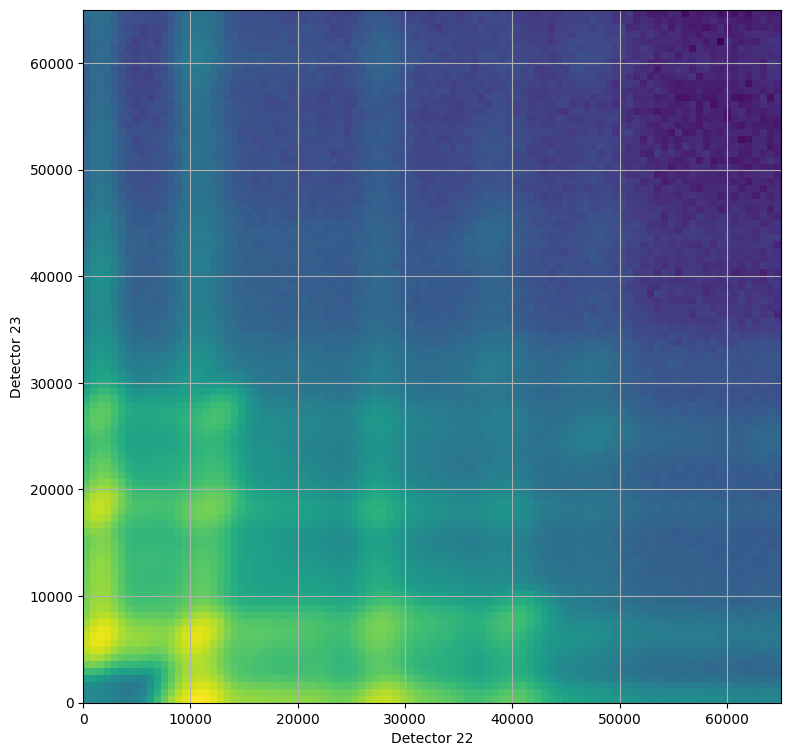

In [29]:
det22 = data[data["word label"].str.contains("22")]["value"][:-1].reset_index(drop=True)
det23 = data[data["word label"].str.contains("23")]["value"].reset_index(drop=True)

#print(len(det22),len(det23))

fig = plt.figure(figsize=(9,9))
plt.hist2d(det22,det23,bins=(np.linspace(0,65000,100),np.linspace(0,65000,100)),label="Data",norm="log")
"""
plt.axvline(lNlo22,linestyle='--',color='b')
plt.axvline(lNhi22,linestyle='-.',color='b')
plt.axvline(lNlo22+hi22,linestyle=':',color='b')
plt.axhline(lNlo23,linestyle='--',color='r')
plt.axhline(lNhi23,linestyle='-.',color='r')
plt.axhline(lNlo23+lNhi23,linestyle=':',color='r')
plt.scatter(lNlo22,lNlo23,marker='>',color='k'); plt.scatter(lNhi22,lNhi23,marker='>',color='k')
plt.xlim(0); plt.ylim(0)
"""
plt.xlabel("Detector 22"),plt.ylabel("Detector 23")
plt.grid(visible=True); 
#plt.grid(visible=True,which='minor',linewidth=5,color='r') #doesn't work blargh
#plt.legend()
plt.show()

In [ ]:
print(data[126322567:])# == "energy_ch_01"])
#So things switch over immediately at 126322568 -- but why?

In [13]:
def starthere(x):
    if (x<126322560) and (x != 0):
        return True
    else:
        return False

data = pd.read_csv("data/test_custom_packet_l300keV_Na_extra_longrun.csv",usecols=["word label","value"],header=0,skiprows=starthere,nrows=17*10000000,na_filter=False)

In [23]:
print(data[data["word label"].str.contains("22")])

              word label  value
0           energy_ch_22  13781
2           energy_ch_22   6313
4           energy_ch_22  20411
6           energy_ch_22  25203
8           energy_ch_22  11167
...                  ...    ...
126322558   energy_ch_22   1462
126322560   energy_ch_22   1462
126322562   energy_ch_22   1462
126322564   energy_ch_22   7651
126322566   energy_ch_22  36543

[63161284 rows x 2 columns]


In [25]:
print(len(data) - 126322566)

63151115


In [12]:
(169999999+1)/34

5000000.0